<a href="https://colab.research.google.com/github/YuukiHnf/GaussianProcess/blob/main/gaussianAndKernelfunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from numpy.random import multivariate_normal as mvnrand
import scipy

In [ ]:
plt.style.use('ggplot')

In [ ]:
class gaussian_funcs():
  def __init__(self, xmin, xmax,N):
    self.xmax = xmax
    self.xmin = xmin
    self.N = N

  def let(self, val, func):
    return func(val)

  def kernel_matrix(self,X, kernel):
    return np.array([kernel(x_i,x_j) for x_i in X for x_j in X]).reshape(N,N) + 1e-6 * np.eye(N)

  def getSamples(self, X, kernel):
    assert self.N == len(X)
    K = self.kernel_matrix(X,kernel)
    return mvnrand(np.zeros(self.N),K)

  def plot_kernel(self,M, kernel_name,ax, **args):
    xx = np.linspace(self.xmin, self.xmax, self.N)
    for m in range(M):
      plt.plot(xx,self.getSamples(xx,self.getKernelFunction(kernel_name, **args)))
  
  def getKernelFunction(self,name=None, **args):
    if name == None:
      print('input kernel name')
      return
    
    if name == 'klinear':
      b = randn()
      return lambda x,y: b + x*y
    if name == 'kexp':
      return lambda x,y: np.exp( -abs(x-y) / args['sigma'])
    if name == 'kgauss':
      return lambda x,y: np.exp(-(x - y)**2 / exp(args['sigma']))
    if name == 'kmatern3':
      return lambda x,y: \
        self.let (abs(x - y), lambda r:
              (1 + sqrt(3) * r / args['sigma']) * exp(- sqrt(3) * r / args['sigma']))
    if name == 'kmatern5':
      return lambda x,y: \
        self.let(abs(x - y), lambda r:
              (1 + sqrt(5) * r / args['sigma'] + 5 * r*r / (3 * args['sigma']*args['sigma'])) * exp(-sqrt(5)*r/args['sigma']))
    

In [ ]:
N = 100
M= 5
GF = gaussian_funcs(-5,5,N)

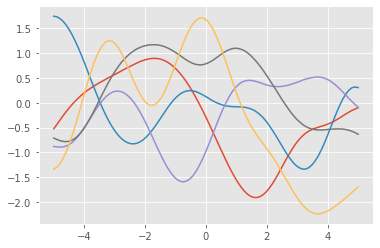

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
GF.plot_kernel(M,'kgauss', ax, sigma=1)

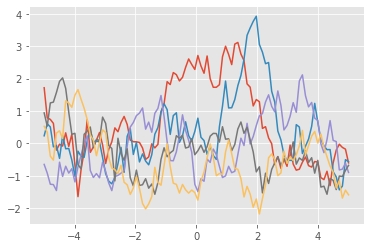

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
GF.plot_kernel(M,'kexp',ax, sigma=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  app.launch_new_instance()


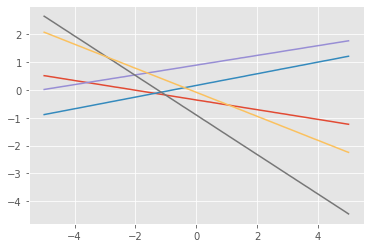

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
GF.plot_kernel(M,'klinear', ax,sigma=1)

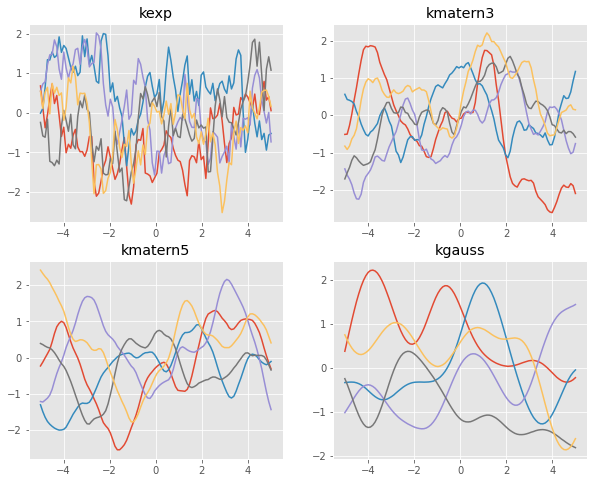

In [ ]:
func_list = ['kexp', 'kmatern3', 'kmatern5', 'kgauss']
#argments = [{},{'sigma'=0.1},{'sigma'=0.1},{'sigma'=0.1} ]
N = 100
M= 5
GF = gaussian_funcs(-5,5,N)

fig = plt.figure(figsize=(10,8))
for i in range(4):
  ax = fig.add_subplot(2,2,i+1)
  ax.set_title(f'{func_list[i]}')
  GF.plot_kernel(M,func_list[i], ax, sigma=1)

# ガウス過程回帰モデルの計算

In [ ]:
class GP_regression():
  def __init__(self,kernel):
    self.kernel = kernel
    self.N = None
  
  def fit(self,X,Y):
    self.N = len(X)
    self.train_X = X
    self.train_Y = Y
    self.train_mean = Y.mean()
    self.train_Y = self.train_Y - self.train_mean
    self.K = np.array([ self.kernel(x_i,x_j) for x_i in X for x_j in self.train_X]).reshape(N,N) + 0.1*np.eye(self.N)

    self.K_inv = np.linalg.inv(self.K)
    self.yy = self.K_inv @ self.train_Y

  def predict_point(self, test_X,test_y):
    from scipy.stats import norm
    k_ = np.array([ self.kernel(test_X,x_) for x_ in self.train_X]).reshape(N,1)
    self.mu = k_.T @ self.yy
    k__ = self.kernel(test_y,test_y) + 0.1
    self.cov = k__ - k_.T @ self.K_inv @ k_
    return norm(self.mu, self.cov).pdf(test_y)

  def plot_kernel(self,xmin, xmax):
    num = 50
    X,Y = np.meshgrid(np.linspace(xmin,xmax), np.linspace(xmin,xmax))
    Z = np.vectorize(lambda x,y : self.predict_point(x,y-self.train_mean))(X,Y)
    plt.pcolor(X,Y,Z, cmap=matplotlib.cm.coolwarm, alpha=0.3)
    plt.colorbar()

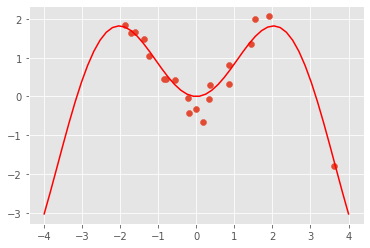

In [ ]:
N = 20
data_X = np.random.normal(0.0,2.0,size=N)
data_Y = data_X * sin(data_X) + np.random.normal(0,0.3,size=N)

x = np.linspace(-4,4)
plt.plot(x,x * sin(x) ,'r')
plt.scatter(data_X,data_Y)

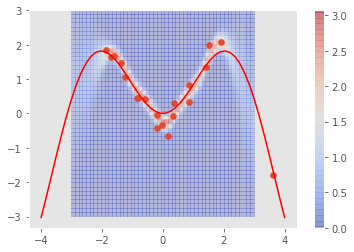

In [ ]:
def kgauss(x,y,sigma=0.5):
  return exp(-(x-y)**2 / (2*sigma*sigma))

GP = GP_regression(kgauss)
GP.fit(data_X,data_Y)
GP.plot_kernel(-3,3)
plt.plot(x,x * sin(x) ,'r')
plt.scatter(data_X,data_Y)

# 表示の仕方を変えてみる

In [ ]:
from numpy import exp,sqrt
from numpy.linalg import inv


def kgauss (params):
    [tau,sigma] = params
    return lambda x,y: tau * exp (-(x - y)**2 / (2 * sigma * sigma))

def kv (x, xtrain, kernel):
    return np.array ([kernel(x,xi) for xi in xtrain])

def kernel_matrix (xx, kernel):
    N = len(xx)
    return np.array (
        [kernel (xi, xj) for xi in xx for xj in xx]
    ).reshape(N,N) + eta * np.eye(N)

def gpr (xx, xtrain, ytrain, kernel):
    K = kernel_matrix (xtrain, kernel)
    Kinv = inv(K)
    ypr = []; spr = []
    for x in xx:
        s = kernel (x,x) + eta
        k = kv (x, xtrain, kernel)
        ypr.append (k.T.dot(Kinv).dot(ytrain))
        spr.append (s - k.T.dot(Kinv).dot(k))
    return ypr, spr

def gpplot (xx, xtrain, ytrain, kernel, params):
    ypr,spr = gpr (xx, xtrain, ytrain, kernel(params))
    plot (xtrain, ytrain, 'bx', markersize=16)
    plot (xx, ypr, 'b-')
    fill_between (xx, ypr - 2*sqrt(spr), ypr + 2*sqrt(spr), color='#ccccff')


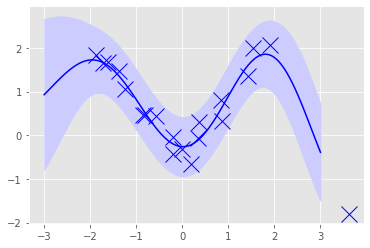

In [ ]:
# plot parameters
N    = 100
xmin = -3
xmax = 3

# GP kernel parameters
eta   = 0.1
tau   = 1
sigma = 1


xtrain = data_X
ytrain = data_Y
kernel = kgauss
params = [tau,sigma]
xx = np.linspace (xmin, xmax, N)
gpplot (xx, xtrain, ytrain, kernel, params)

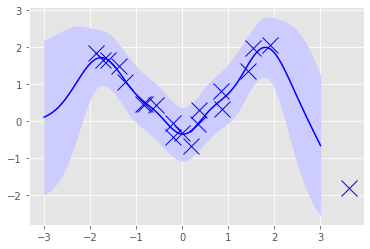

In [ ]:
eta   = 0.1
tau   = 1
sigma = 0.5

kernel = kgauss
params = [tau,sigma]
xx = np.linspace (xmin, xmax, N)
gpplot (xx, xtrain, ytrain, kernel, params)
